In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter

In [12]:
colors = plt.colormaps['jet'].resampled(10)

In [13]:
f =  ScalarFormatter(useOffset=False, useMathText=True)
f.set_scientific(True)
f.set_powerlimits((0, 0))

def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX


 # Green Functions in a normal range

In [14]:
z1 = np.geomspace(5.0e+6,1.0e+4,10)

In [15]:
folder = 'Greens_func/'
x = []
DT = []
DI_N = []
DI = []
DI_CMB = []
I = []
I_CMB = []
green= []

for i in range (len(z1)):
    file_path = os.path.join(folder, f"Dn.delta-z.k_00{i}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    green.append(op)

    a = op.iloc[:, 0].values
    x.append(a)
    b = op.iloc[:, 4].values
    DT.append(b)
    c = op.iloc[:, 5].values
    DI.append(c)
    d = op.iloc[:, 12].values
    DI_CMB.append(d)
    e = op.iloc[:, 6].values
    DI_N.append(e)
    f = op.iloc[:, 10].values
    I_CMB.append(f)
    g= op.iloc[:, 11].values
    I.append(g) 


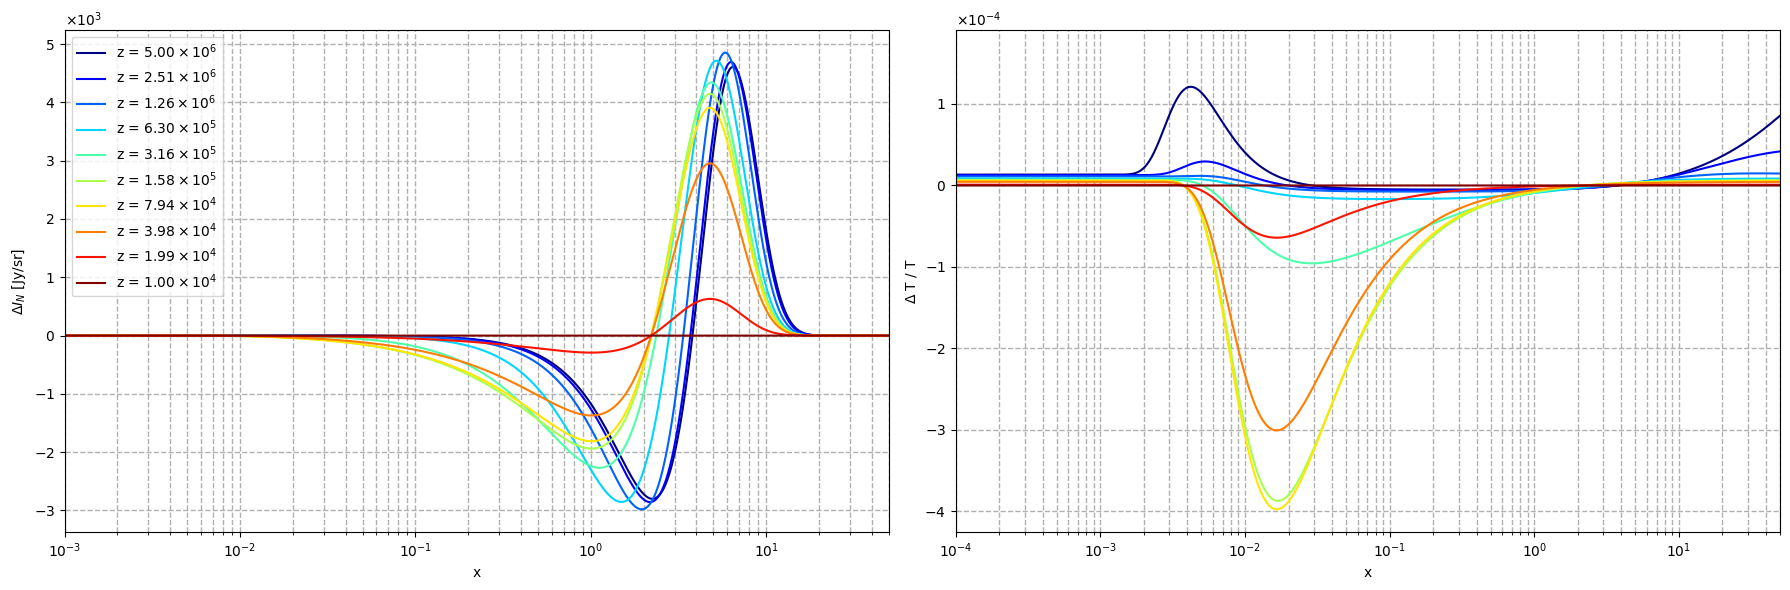

In [16]:

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
#fig.suptitle(f"Particle decay scenario ")

# Plot per DI_N2 (primo subplot)
for i in range(len(z1)):
    ax1.plot(x[i], DI[i], label=f"z = {sci_notation(z1[i])}", color = colors(i))

ax1.set_xscale('log')
ax1.set_xlim([1e-3, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax1.legend()

# Plot per DT2 (secondo subplot)
for i in range(len(z1)):
    ax2.plot(x[i], DT[i], color = colors(i))



ax2.set_xscale('log')
ax2.set_xlim([1e-4, 50])
#ax2.set_ylim([-2.3e-3, 1.1e-2])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

Very nice, only few values, regular setup for early times

# Late time Green functions

In [17]:
folder = 'Greens_lt/'
xlt = []
DTlt = []
DI_Nlt = []
DIlt = []
DI_CMBlt = []
Ilt = []
I_CMBlt = []
greenlt = []

for i in range (10):
    file_path = os.path.join(folder, f"Dn.delta-z.k_00{i}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    greenlt.append(op)

    a = op.iloc[:, 0].values
    xlt.append(a)
    b = op.iloc[:, 4].values
    DTlt.append(b)
    c = op.iloc[:, 5].values
    DIlt.append(c)
    d = op.iloc[:, 12].values
    DI_CMBlt.append(d)
    e = op.iloc[:, 6].values
    DI_Nlt.append(e)
    f = op.iloc[:, 10].values
    I_CMBlt.append(f)
    g= op.iloc[:, 11].values
    Ilt.append(g) 


In [18]:
zlt = np.geomspace(1.0e+2,5.0e+4,10)


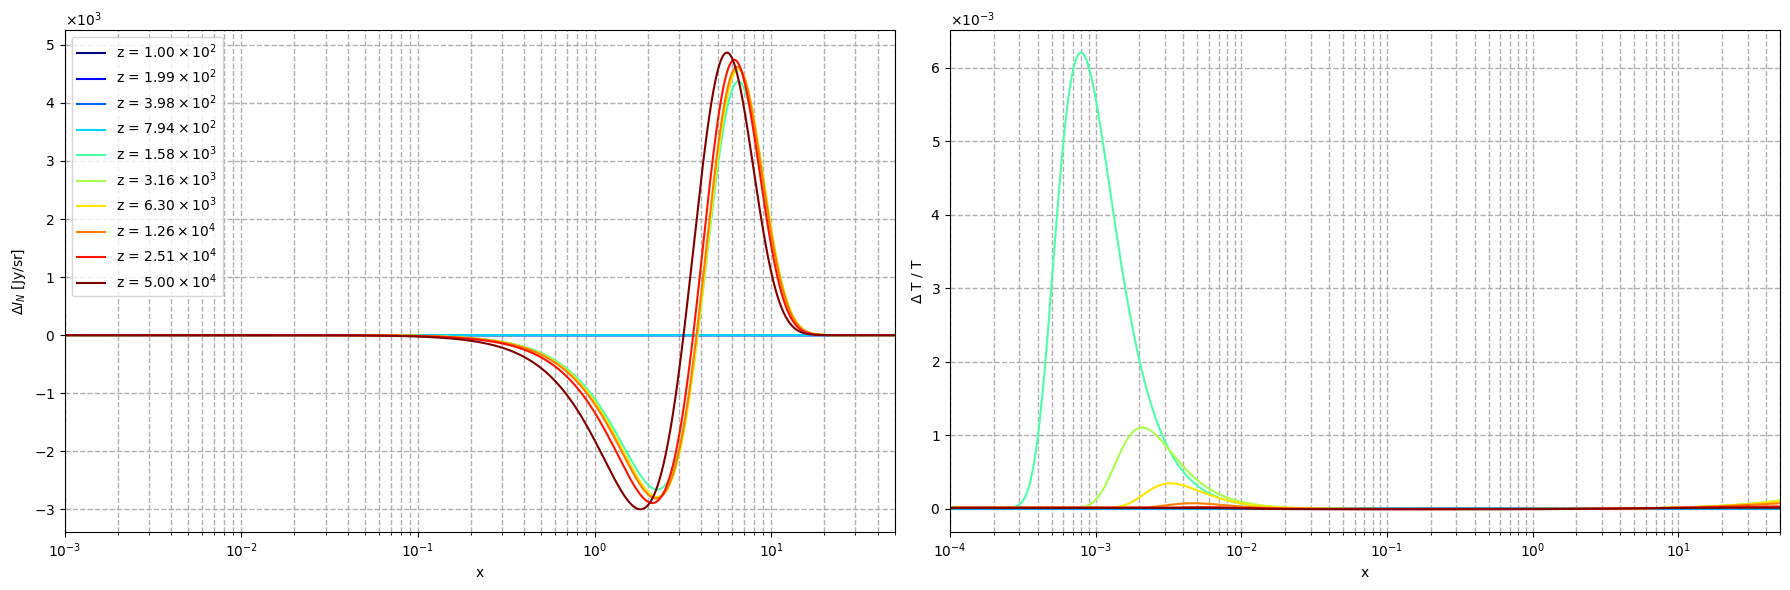

In [19]:

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
#fig.suptitle(f"Particle decay scenario ")

# Plot per DI_N2 (primo subplot)
for i in range(len(zlt)):
    ax1.plot(xlt[i], DI_Nlt[i], label=f"z = {sci_notation(zlt[i])}", color = colors(i))

ax1.set_xscale('log')
ax1.set_xlim([1e-3, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax1.legend()

# Plot per DT2 (secondo subplot)
for i in range(len(zlt)):
    ax2.plot(xlt[i], DTlt[i], color = colors(i))



ax2.set_xscale('log')
ax2.set_xlim([1e-4, 50])
#ax2.set_ylim([-2.3e-3, 1.1e-2])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

The CosmoTherm code was wrong, now is fixed

# Late time visibility function

See the other notebook for this

There are problems with the late time green function setup!

# $\mu$ and $y$ visibility functions

In [20]:
Y = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2 * ( x* (np.exp(x)+1)/(np.exp(x)-1)-4 )
M = lambda x: 1.401* x**4*np.exp(x)/(np.exp(x)-1)**2 * (0.4561-1/x)

 Use values uploaded at the beginning

# Build the Matrix

In [21]:
def rowswap(A,a,b,ncol):
    for i in range (ncol):
        temp = A[a][i]
        A[a][i] = A[b][i]
        A[b][i] = temp

def rowswap2(B,a,b):
    temp= B[a][0]
    B[a][0] = B[b][0]
    B[b][0]=temp

In [22]:
def Gaussian_elimination(A,B,ncol,nrow):
    temp0 = 0
    for k in range (ncol-1):
        temp0 = k

        for n in range (k+1,nrow):
            if( abs(A[n][k]) > abs(A[temp0][k])):
               temp0 = n
        if (temp0!=k):
            rowswap(A,k,temp0,ncol)
            rowswap2(B,k,temp0)

        #if A[k][k] == 0:
        #    raise ValueError("Pivot is zero. The matrix might be singular or require better pivoting.")

        for i in range (k+1,nrow):
            g = A[i][k]/A[k][k]
            for j in range (k+1,ncol): A[i][j] -= g*A[k][j]
            A[i][k] = 0.0
            B [i][0] -= g*B[k][0]
  




In [23]:
def solution (A,B):
    x = [0 for _ in range(ncol)]
    for i in range (nrow-1,-1,-1):
        temp= B[i][0]
        for j in range(ncol-1, i, -1):
          
            temp -= x[j]* A[i][j]

        #if A[i][i] == 0:
        #    raise ValueError("Division by zero detected in row {}. Matrix might be singular.".format(i))
        
        x[i] = temp /A[i][i]
    return x

# Batch code, with single delta injections

In [27]:
zh2 = np.array([800,1000,1200])
folder = 'batch_deltas/batch/PDE-non-linear/'
x_bt1 = []
DT_bt1 = []
DI_Nbt1 = []
DI_bt1 = []
DI_CMB_bt1 = []
I_bt1 = []
I_CMB_bt1 = []
green_bt1 = []

for i in range (3):
    file_path = os.path.join(folder, f"Dn.delta-z_z_heat_00{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    greenlt.append(op)

    a = op.iloc[:, 0].values
    x_bt1.append(a)
    b = op.iloc[:, 4].values
    DT_bt1.append(b)
    c = op.iloc[:, 5].values
    DI_bt1.append(c)
    d = op.iloc[:, 12].values
    DI_CMB_bt1.append(d)
    e = op.iloc[:, 6].values
    DI_Nbt1.append(e)
    f = op.iloc[:, 10].values
    I_CMB_bt1.append(f)
    g= op.iloc[:, 11].values
    I_bt1.append(g) 


In [28]:
colors = plt.colormaps['jet'].resampled(3)

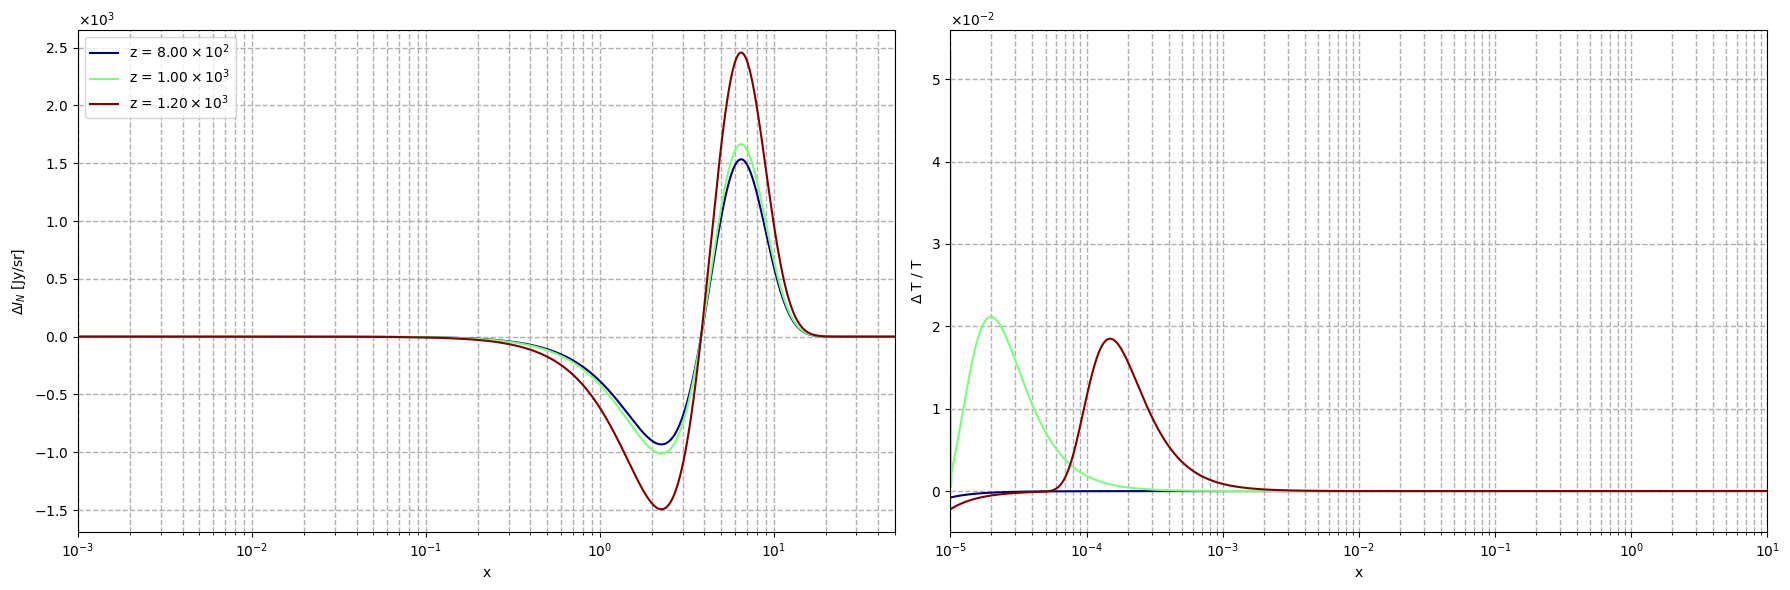

In [29]:
# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
#fig.suptitle(f"Particle decay scenario ")

# Plot per DI_N2 (primo subplot)
for i in range(len(zh2)):
    ax1.plot(x_bt1[i], DI_Nbt1[i], label=f"z = {sci_notation(zh2[i])}", color = colors(i))

ax1.set_xscale('log')
ax1.set_xlim([1e-3, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax1.legend()

# Plot per DT2 (secondo subplot)
for i in range(len(zh2)):
    ax2.plot(x_bt1[i], DT_bt1[i], color = colors(i))



ax2.set_xscale('log')
ax2.set_xlim([1e-5,10 ])
#ax2.set_ylim([-2.3e-3, 1.1e-2])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

# Batch code, with a lot of delta injections

yes hubble cooling, no Xe

In [34]:
zh3 = np.geomspace(1e+2,1e+4,50)
folder = 'batch_nohc_noxe/batch/PDE-non-linear/'
x_bt2 = []
DT_bt2 = []
DI_Nbt2 = []
Te2 = []


for i in range (len(zh3)):
    if (i>8):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_0{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_00{i+1}.dat")

    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    

    a = op.iloc[:, 0].values
    x_bt2.append(a)
    b = op.iloc[:, 4].values
    DT_bt2.append(b)    
    c = op.iloc[:, 6].values
    DI_Nbt2.append(c)

    if (i>8):
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_0{i+1}.dat")
    else:
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_00{i+1}.dat")
     
    op2 = pd.read_csv(file_path2, skiprows=6, delimiter=' ', header=None)
    d= op2.iloc[:,0]
    z2.append(d)
    e= op2.iloc[:,2]
    Te2.append(e)
    

In [35]:
colors = plt.colormaps['gist_rainbow'].resampled(50)

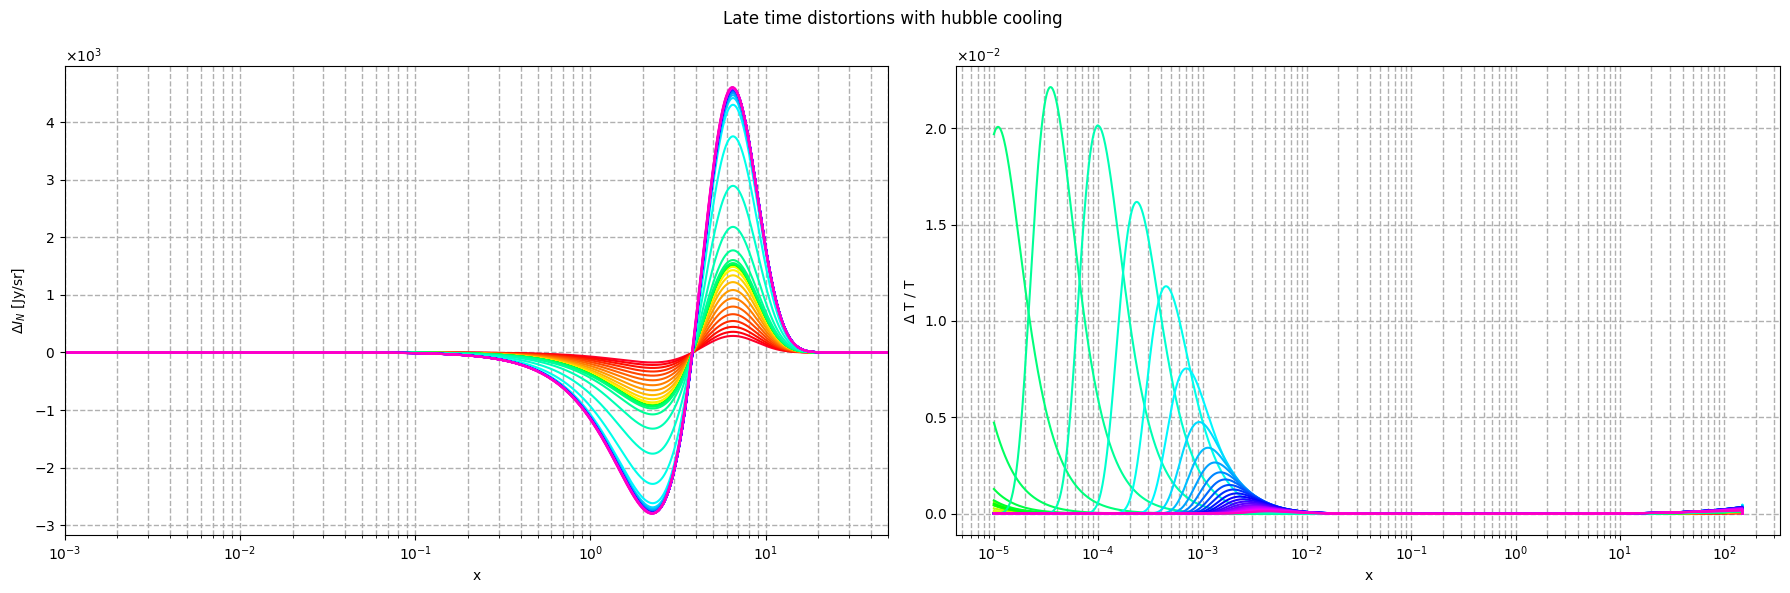

In [36]:
# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle(f"Late time distortions with hubble cooling ")

# Plot per DI_N2 (primo subplot)
for i in range(len(zh3)):
    ax1.plot(x_bt2[i], DI_Nbt2[i],  color = colors(i))

ax1.set_xscale('log')
ax1.set_xlim([1e-3, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax1.legend()

# Plot per DT2 (secondo subplot)
for i in range(len(zh3)):
    ax2.plot(x_bt2[i], DT_bt2[i], color = colors(i))



ax2.set_xscale('log')
#ax2.set_xlim([500,1500 ])
#ax2.set_xlim([1e-5, 1e2])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

# Integration

In [37]:
K = 1.3e-23 # J / K
vc = 3e8 #m / s
h_pl = 6.62e-34 #J*s
T = 2.725 #K

In [38]:
density = np.zeros(len(zh3))
temp = np.zeros(len(zh3))

for j in range (len(zh3)):
    for i in range (len(x_bt2[j])-1):
        h = x_bt2[j][i+1] - x_bt2[j][i]
        temp[j] = temp[j] + DI_Nbt2[j][i]*h
    density[j] = (4*np.pi*K* T  /h_pl/vc) / (4.17e-14) * 1e-26 * temp[j]   




        

In [39]:
#fig, ax = plt.subplots( figsize=(18, 6))
#
#
#ax.plot(zh3, density, color = "purple", label= "$I_y$")
#ax.plot(zh3, -density, color = "purple",linestyle = "dashed")
#
#
#ax.set_xscale('log')
#ax.set_yscale('log')
##ax.set_xlim([100, 10000])
#ax.set_ylabel("$\Delta \\rho  / \\rho$")
#ax.set_xlabel("zh")
##ax1.set_title("All $\Delta$ I_N curves")
#ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax.legend()
#
#
#
#
#
##ax.yaxis.set_major_formatter(ScalarFormatter())    
##ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#
#plt.tight_layout()
#plt.show()

In [40]:
I = density / (1e-5)

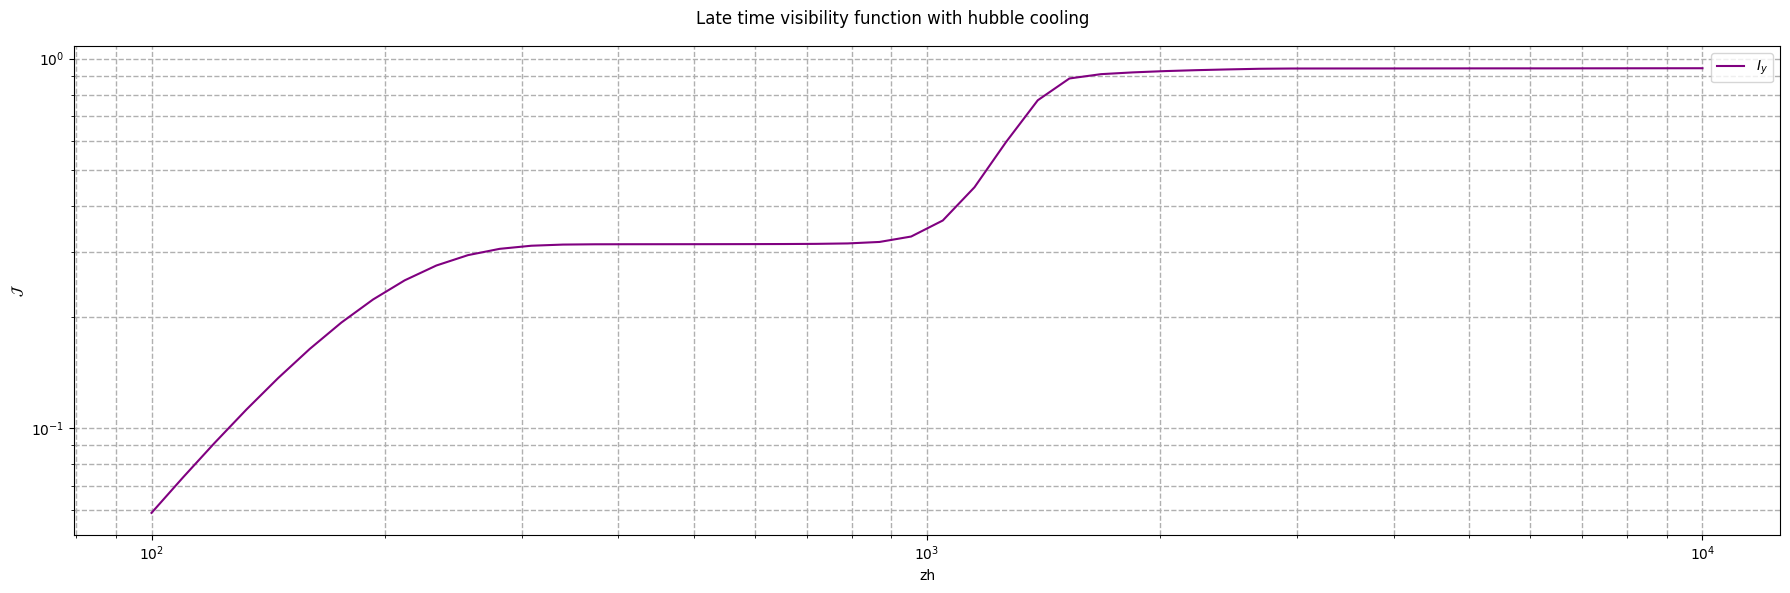

In [41]:
fig, ax = plt.subplots( figsize=(18, 6))
fig.suptitle(f"Late time visibility function with hubble cooling ")

ax.plot(zh3, I, color = "purple", label= "$I_y$")
ax.plot(zh3, -I, color = "purple",linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([100, 10000])
ax.set_ylabel("$\mathcal{J}$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

### no hubble cooling or Xe evolution

In [42]:
folder = 'batch_nohc_noxe/batch/PDE-non-linear/'
x_bt3 = []
DT_bt3 = []
DI_Nbt3 = []

green_bt3 = []


for i in range (len(zh3)):
    if (i>8):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_0{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_00{i+1}.dat")

    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    greenlt.append(op)

    a = op.iloc[:, 0].values
    x_bt3.append(a)
    b = op.iloc[:, 4].values
    DT_bt3.append(b)
    e = op.iloc[:, 6].values
    DI_Nbt3.append(e)
   

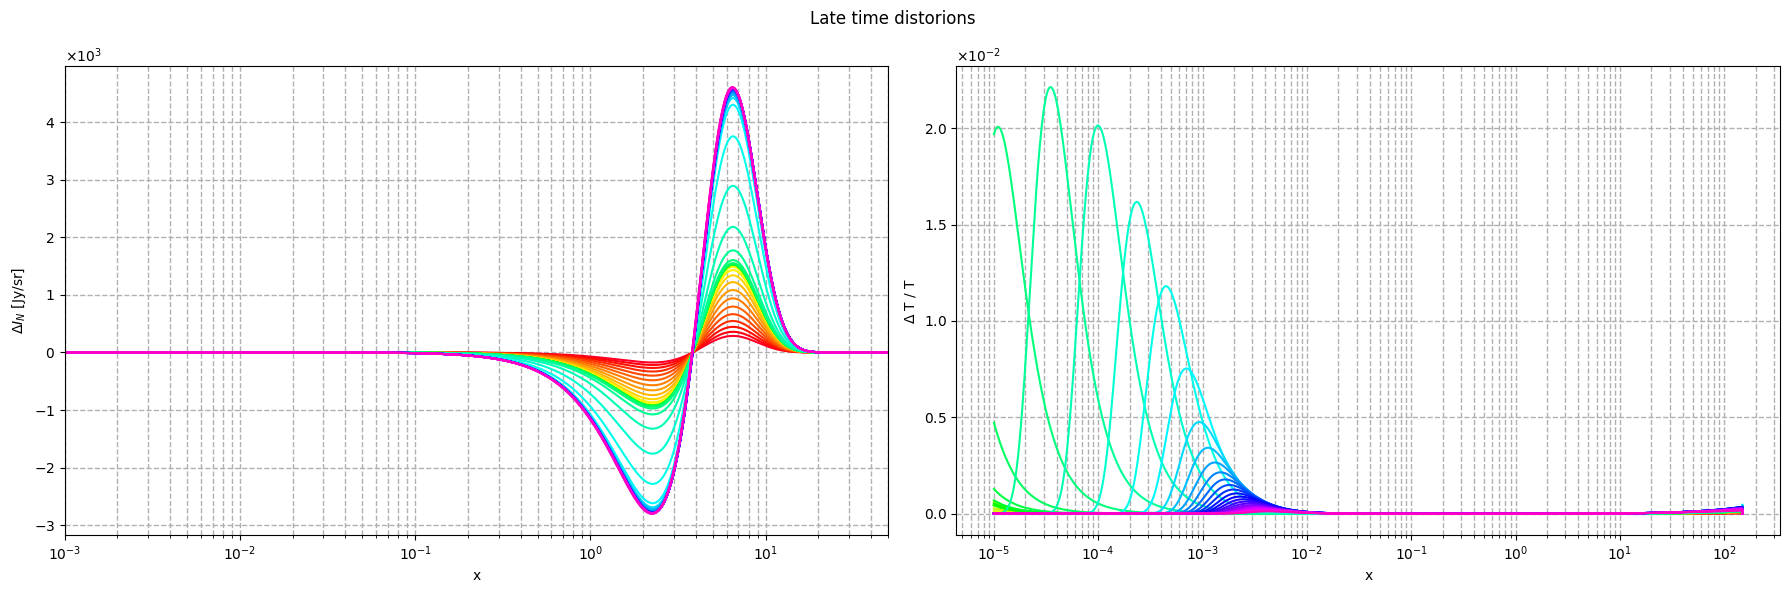

In [43]:
# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle(f"Late time distorions ")

# Plot per DI_N2 (primo subplot)
for i in range(len(zh3)):
    ax1.plot(x_bt3[i], DI_Nbt3[i], color = colors(i))

ax1.set_xscale('log')
ax1.set_xlim([1e-3, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax1.legend()

# Plot per DT2 (secondo subplot)
for i in range(len(zh3)):
    ax2.plot(x_bt3[i], DT_bt3[i], color = colors(i))



ax2.set_xscale('log')
#ax2.set_ylim([-0.00002,0.00008 ])
#ax2.set_xlim([1e-3, 1e2])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [44]:
density2 = np.zeros(len(zh3))
temp2 = np.zeros(len(zh3))

for j in range (len(zh3)):
    for i in range (len(x_bt3[j])-1):
        h = x_bt3[j][i+1] - x_bt3[j][i]
        temp2[j] = temp2[j] + DI_Nbt3[j][i]*h
    density2[j] = (4*np.pi*K* T  /h_pl/vc) / (4.17e-14) * 1e-26 * temp2[j]   

I2 = density2 / (1e-5)


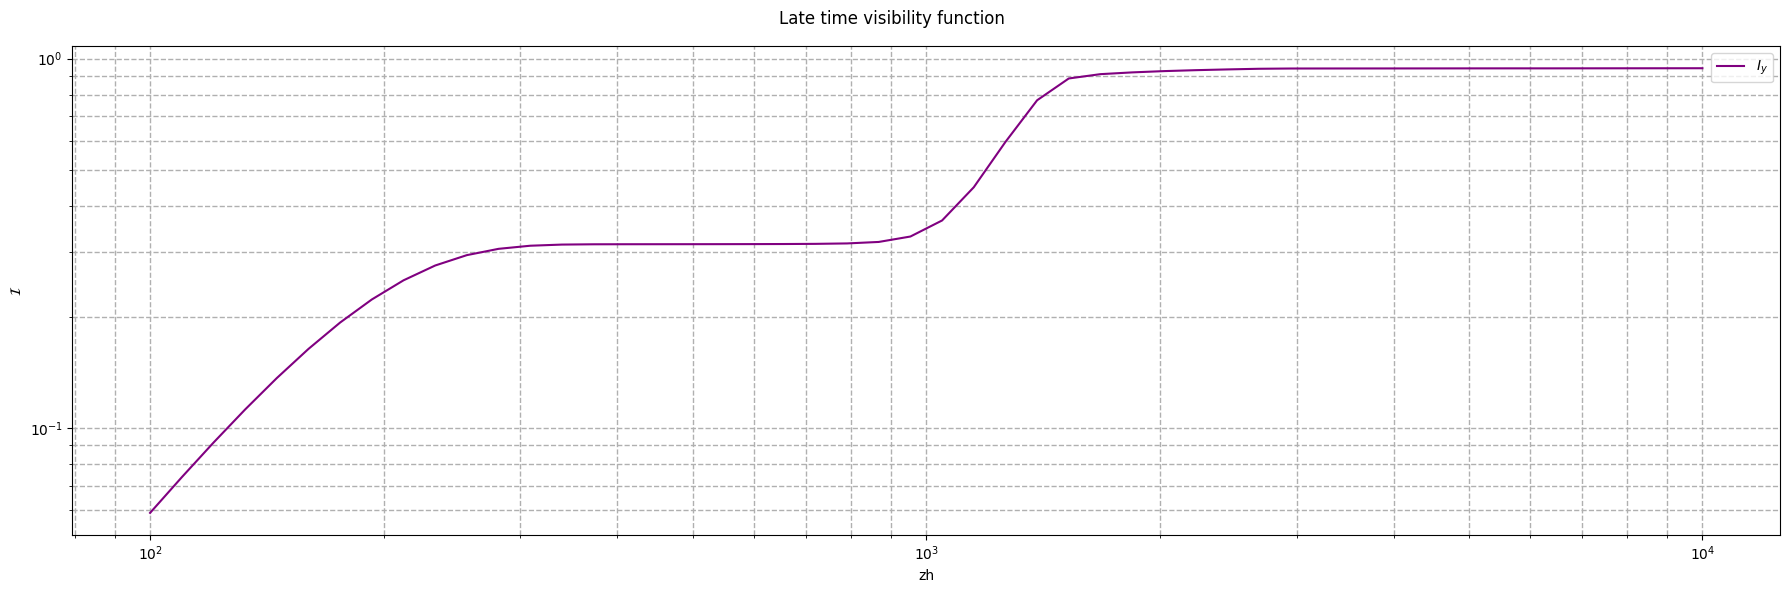

In [45]:
fig, ax = plt.subplots( figsize=(18, 6))
fig.suptitle(f"Late time visibility function ")

ax.plot(zh3, I2, color = "purple", label= "$I_y$")
ax.plot(zh3, -I2, color = "purple",linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([100, 10000])
ax.set_ylabel("$\mathcal{I}$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

## no Hubble cooling and yes evolution of Xe

In [46]:
folder = 'batch_nohc_yxe/batch/PDE-non-linear/'
x_bt4 = []
DT_bt4 = []
DI_Nbt4 = []

green_bt4 = []


for i in range (len(zh3)):
    if (i>8):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_0{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_00{i+1}.dat")

    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    greenlt.append(op)

    a = op.iloc[:, 0].values
    x_bt4.append(a)
    b = op.iloc[:, 4].values
    DT_bt4.append(b)
    e = op.iloc[:, 6].values
    DI_Nbt4.append(e)
    

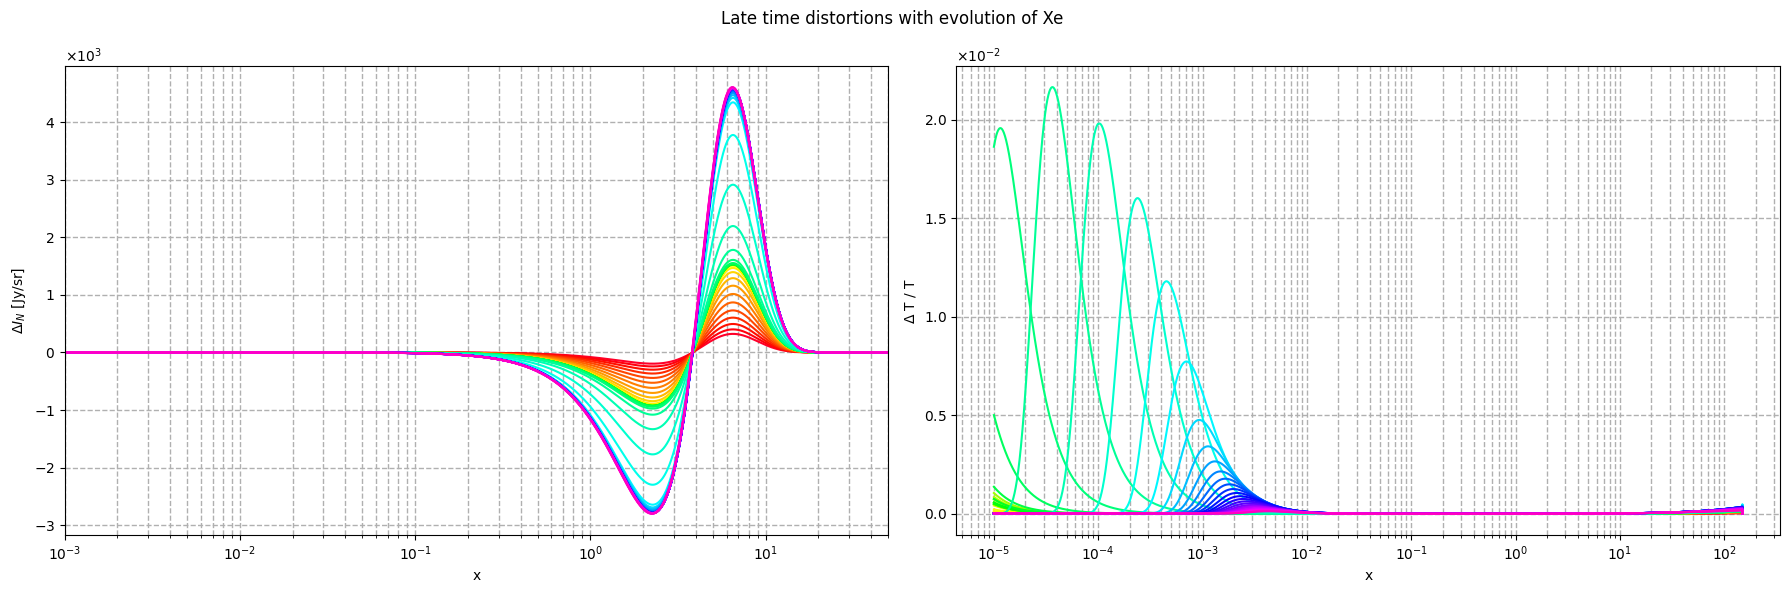

In [47]:
# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle(f"Late time distortions with evolution of Xe ")

# Plot per DI_N2 (primo subplot)
for i in range(len(zh3)):
    ax1.plot(x_bt4[i], DI_Nbt4[i], color = colors(i))

ax1.set_xscale('log')
ax1.set_xlim([1e-3, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax1.legend()

# Plot per DT2 (secondo subplot)
for i in range(len(zh3)):
    ax2.plot(x_bt4[i], DT_bt4[i], color = colors(i))



ax2.set_xscale('log')
#ax2.set_ylim([-0.00002,0.00008 ])
#ax2.set_xlim([1e-3, 1e2])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [48]:
density3 = np.zeros(len(zh3))
temp3 = np.zeros(len(zh3))

for j in range (len(zh3)):
    for i in range (len(x_bt4[j])-1):
        h = x_bt4[j][i+1] - x_bt4[j][i]
        temp3[j] = temp3[j] + DI_Nbt4[j][i]*h
    density3[j] = (4*np.pi*K* T  /h_pl/vc) / (4.17e-14) * 1e-26 * temp3[j]   

I3 = density3 / (1e-5)

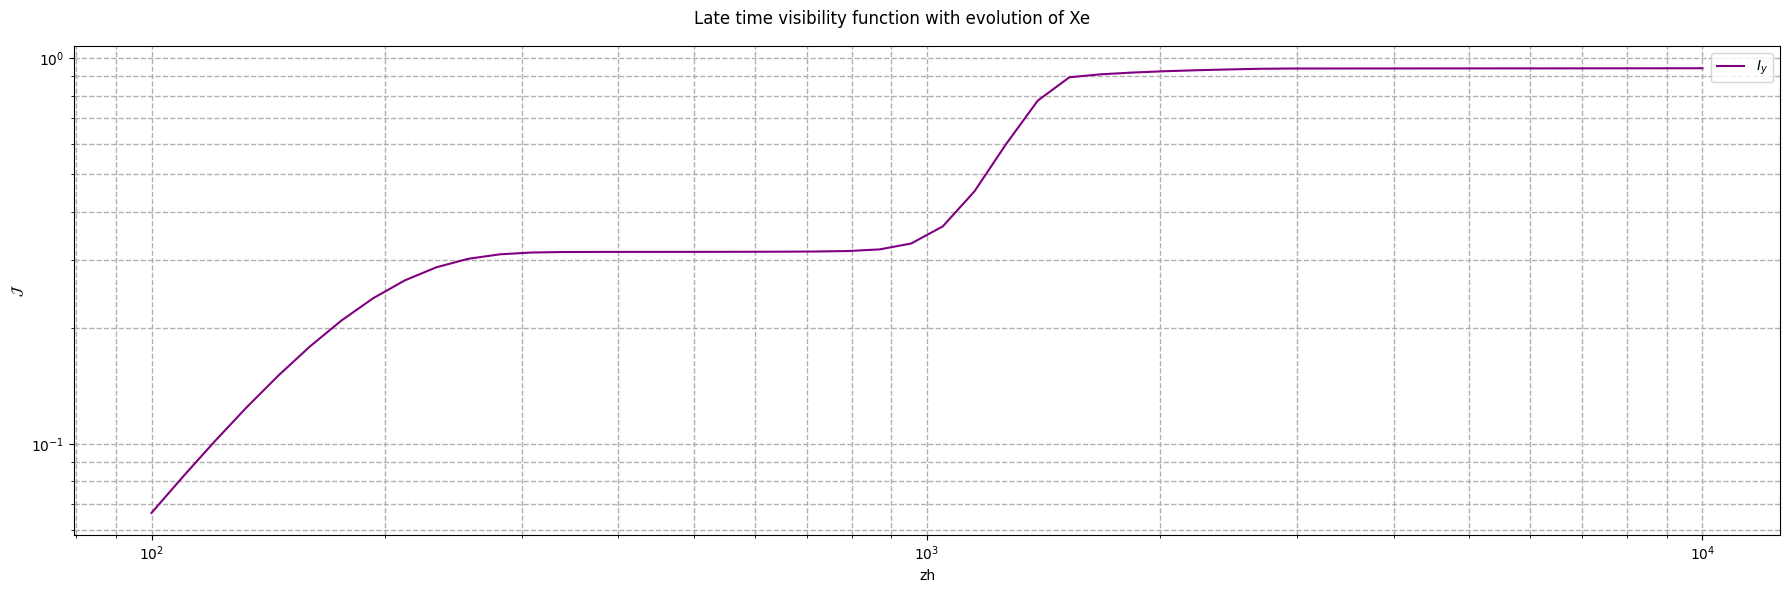

In [49]:
fig, ax = plt.subplots( figsize=(18, 6))
fig.suptitle(f"Late time visibility function with evolution of Xe ")

ax.plot(zh3, I3, color = "purple", label= "$I_y$")
ax.plot(zh3, -I3, color = "purple",linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([100, 10000])
ax.set_ylabel("$\mathcal{J}$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

## yes both, hubble cooling and evolution of Xe

In [50]:
folder = 'out_yhcl_yXe/batch/PDE-non-linear/'
x_bt5 = []
DT_bt5 = []
DI_Nbt5 = []

green_bt5 = []


for i in range (len(zh3)):
    if (i>8):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_0{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_00{i+1}.dat")

    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    greenlt.append(op)

    a = op.iloc[:, 0].values
    x_bt5.append(a)
    b = op.iloc[:, 4].values
    DT_bt5.append(b)
    e = op.iloc[:, 6].values
    DI_Nbt5.append(e)
    

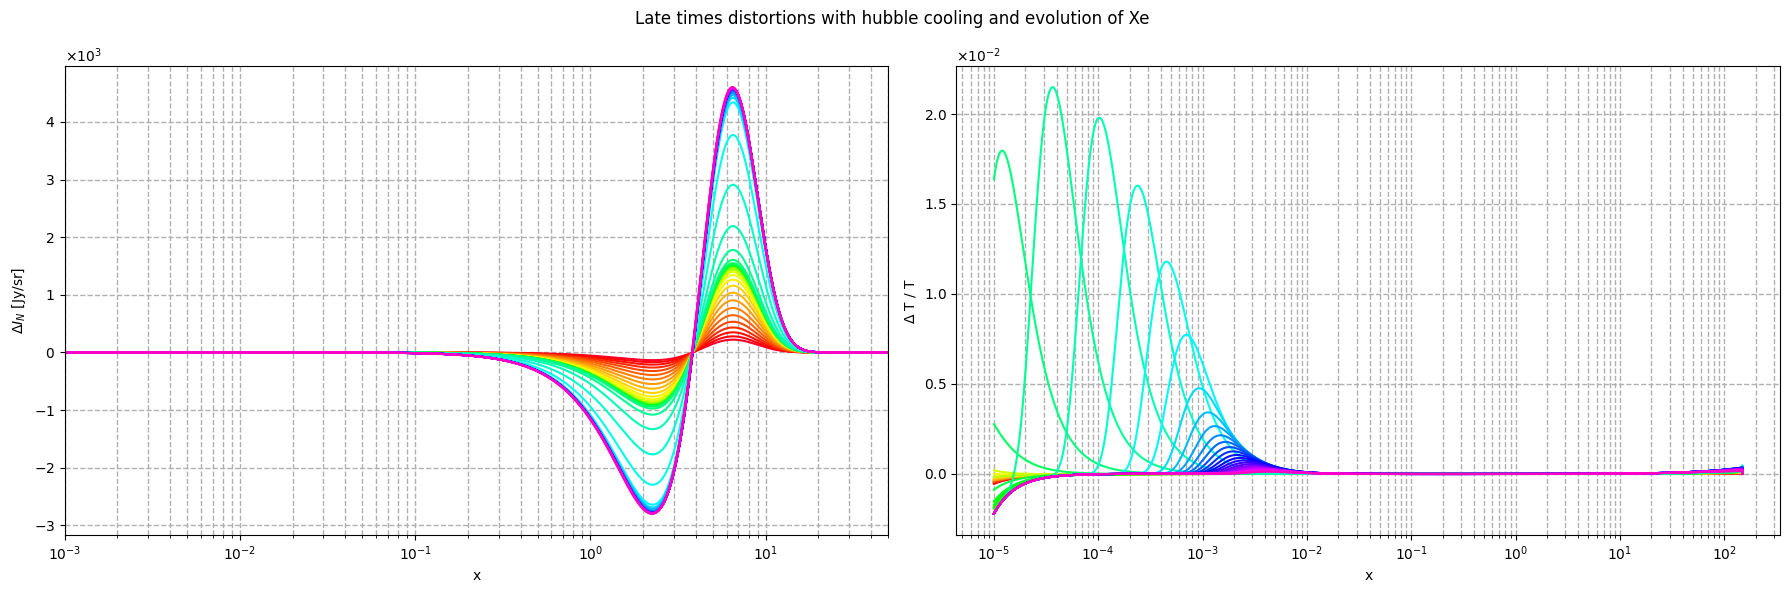

In [51]:
# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle(f"Late times distortions with hubble cooling and evolution of Xe ")

# Plot per DI_N2 (primo subplot)
for i in range(len(zh3)):
    ax1.plot(x_bt5[i], DI_Nbt5[i], color = colors(i))

ax1.set_xscale('log')
ax1.set_xlim([1e-3, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax1.legend()

# Plot per DT2 (secondo subplot)
for i in range(len(zh3)):
    ax2.plot(x_bt5[i], DT_bt5[i], color = colors(i))



ax2.set_xscale('log')
#ax2.set_ylim([-0.00002,0.00008 ])
#ax2.set_xlim([1e-3, 1e2])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [52]:
density4 = np.zeros(len(zh3))
temp4 = np.zeros(len(zh3))

for j in range (len(zh3)):
    for i in range (len(x_bt5[j])-1):
        h = x_bt5[j][i+1] - x_bt5[j][i]
        temp4[j] = temp4[j] + DI_Nbt5[j][i]*h
    density4[j] = (4*np.pi*K* T  /h_pl/vc) / (4.17e-14) * 1e-26 * temp4[j]   

I4 = density4 / (1e-5)

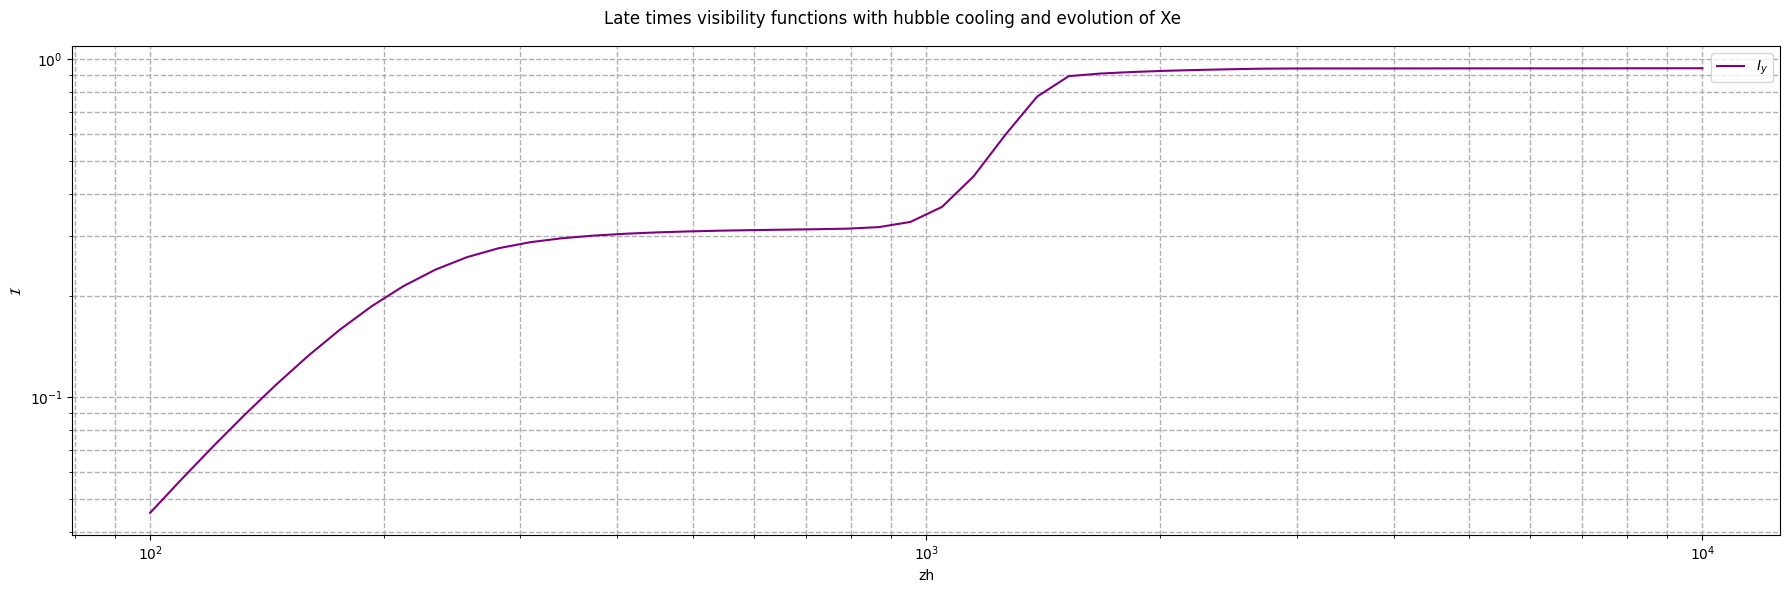

In [53]:
fig, ax = plt.subplots( figsize=(18, 6))
fig.suptitle(f"Late times visibility functions with hubble cooling and evolution of Xe ")

ax.plot(zh3, I4, color = "purple", label= "$I_y$")
ax.plot(zh3, -I4, color = "purple",linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([100, 10000])
ax.set_ylabel("$\mathcal{I}$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

# Comparisions

/tmp/ipykernel_1643/609905308.py:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


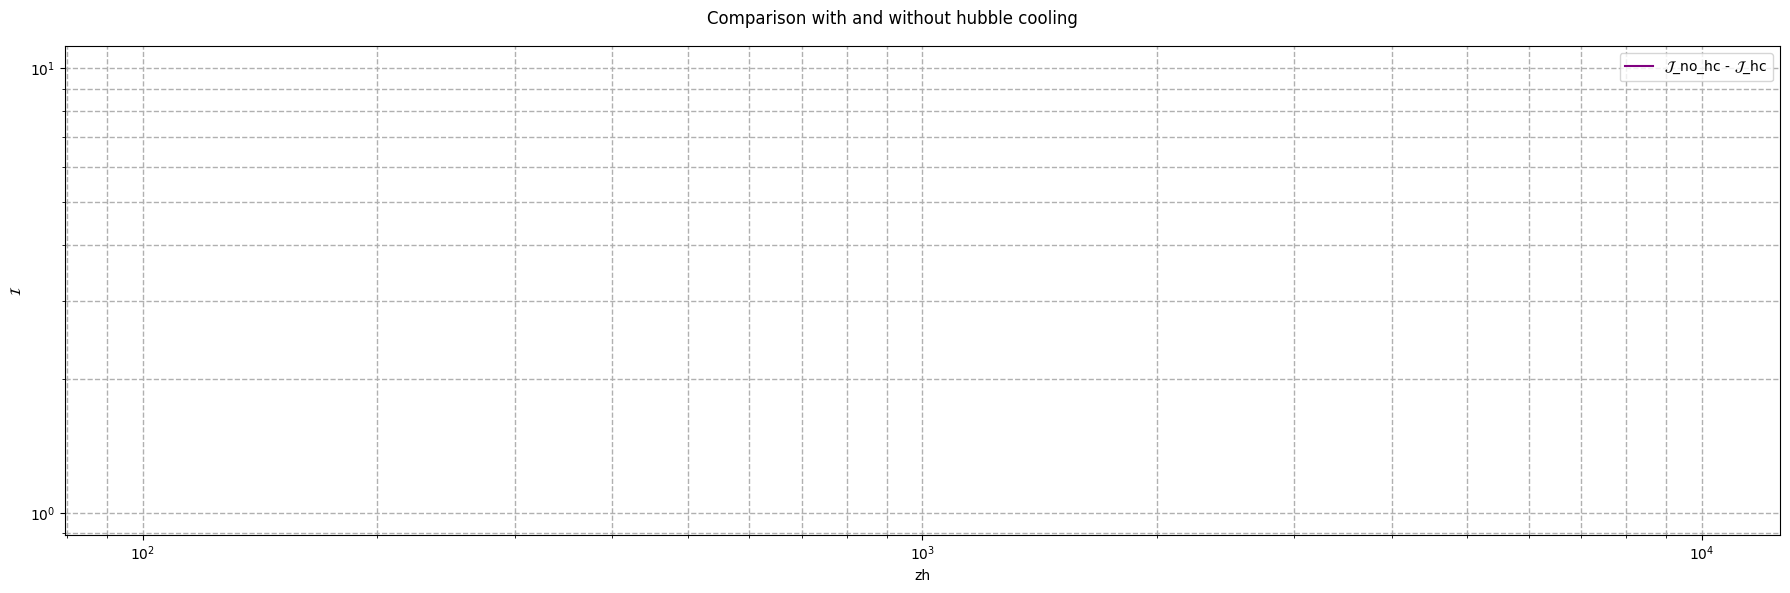

In [54]:
fig, ax = plt.subplots( figsize=(18, 6))
fig.suptitle(f"Comparison with and without hubble cooling ")

ax.plot(zh3, I2 -I, color = "purple", label= "$\mathcal{J}$_no_hc - $\mathcal{J}$_hc")
ax.plot(zh3, I - I2 , color = "purple",linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([100, 10000])
ax.set_ylabel("$\mathcal{I}$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

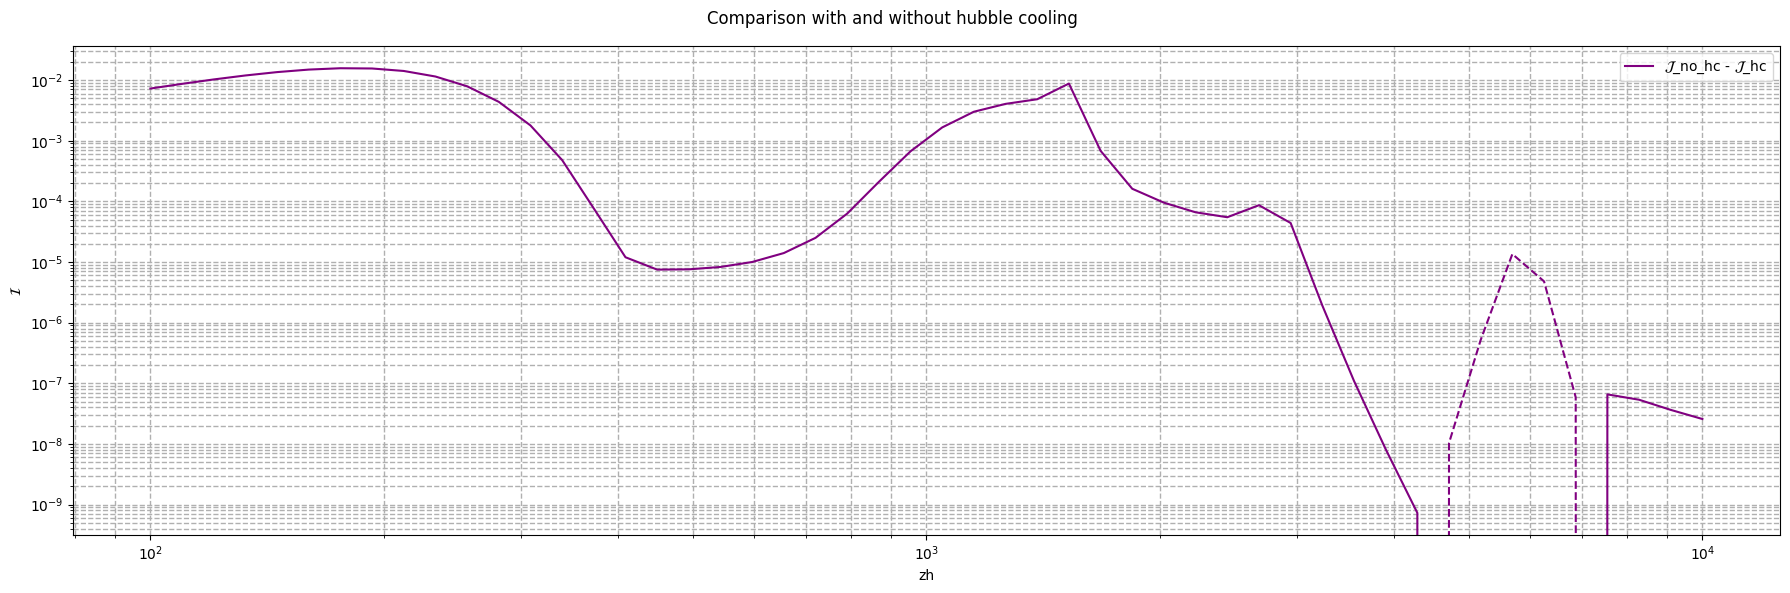

In [55]:
fig, ax = plt.subplots( figsize=(18, 6))
fig.suptitle(f"Comparison with and without hubble cooling ")

ax.plot(zh3, I3 -I2, color = "purple", label= "$\mathcal{J}$_no_hc - $\mathcal{J}$_hc")
ax.plot(zh3, I2 - I3 , color = "purple",linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([100, 10000])
ax.set_ylabel("$\mathcal{I}$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

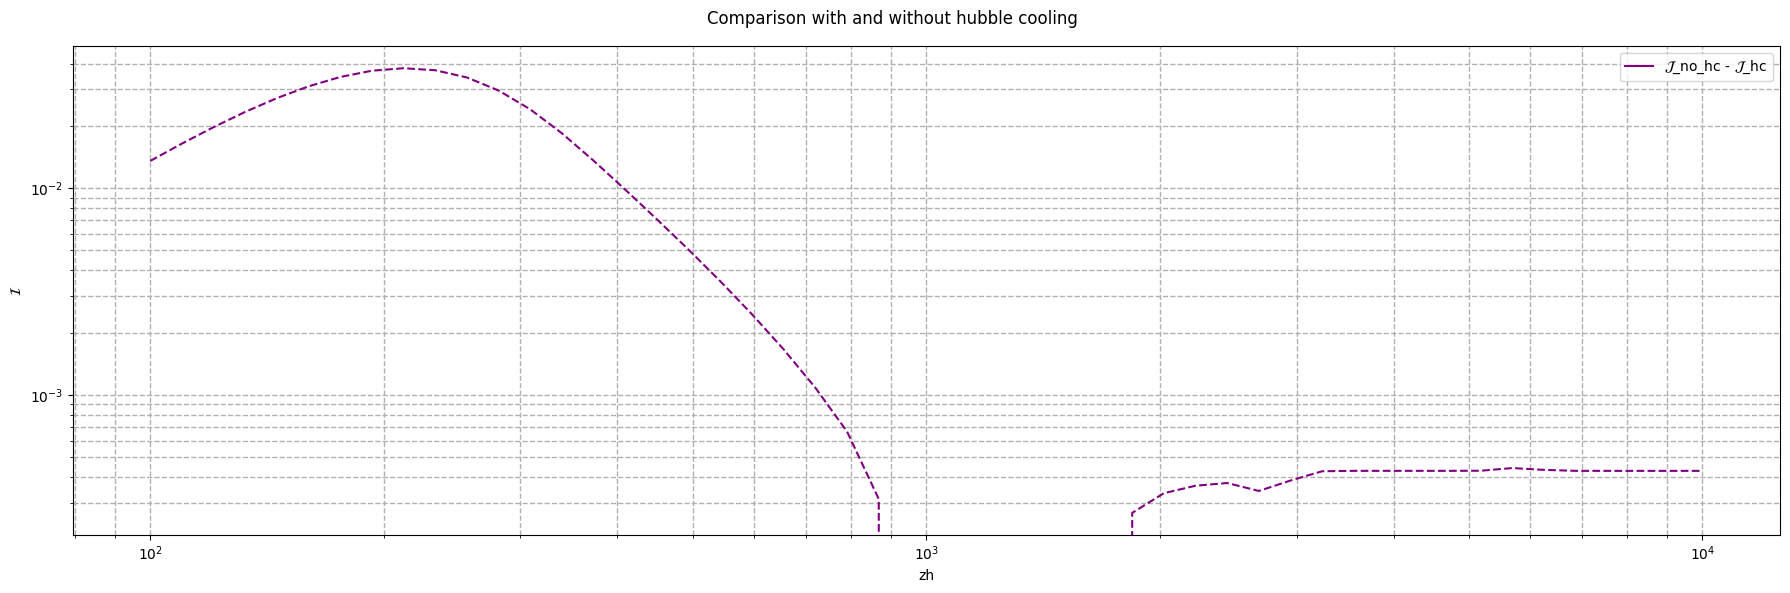

In [56]:
fig, ax = plt.subplots( figsize=(18, 6))
fig.suptitle(f"Comparison with and without hubble cooling ")

ax.plot(zh3, I4 -I3, color = "purple", label= "$\mathcal{J}$_no_hc - $\mathcal{J}$_hc")
ax.plot(zh3, I2 - I4 , color = "purple",linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([100, 10000])
ax.set_ylabel("$\mathcal{I}$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

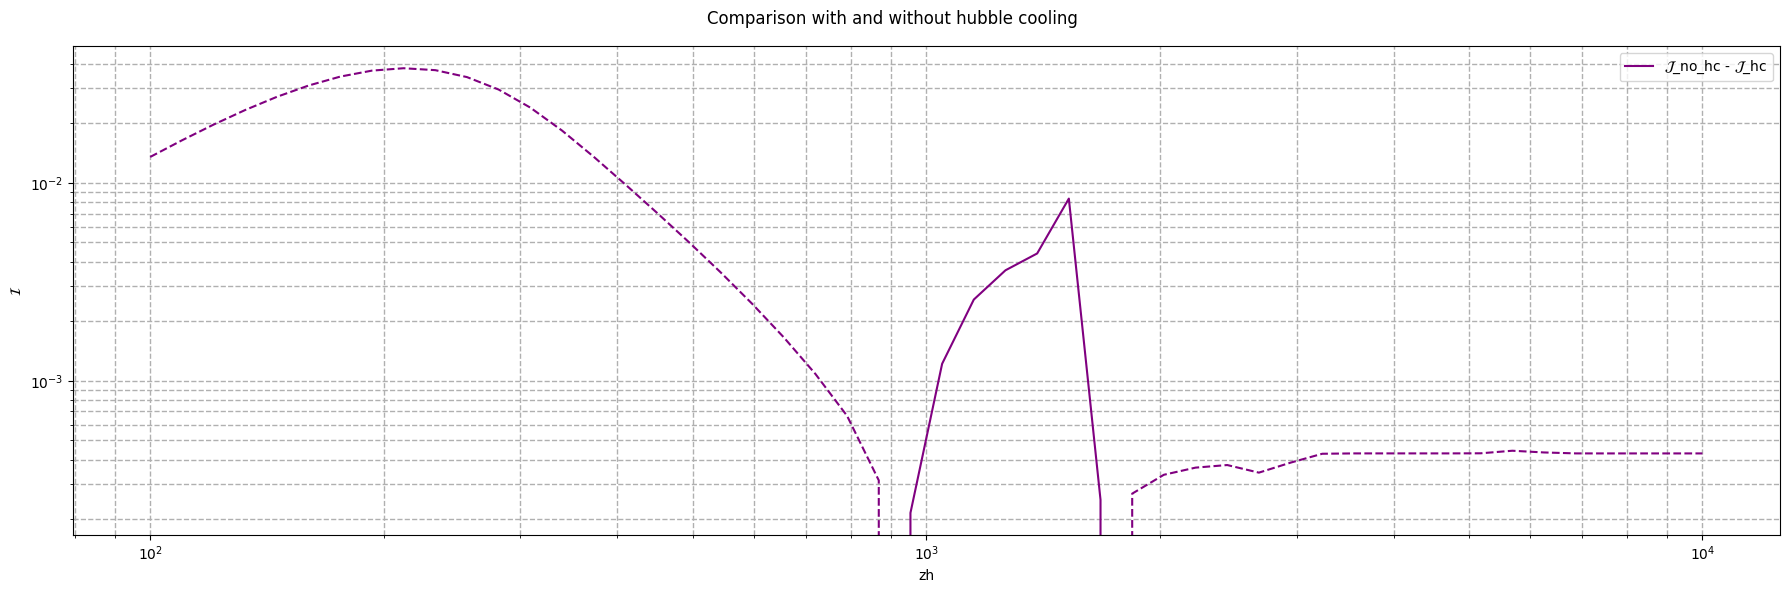

In [57]:
fig, ax = plt.subplots( figsize=(18, 6))
fig.suptitle(f"Comparison with and without hubble cooling ")

ax.plot(zh3, I4 -I, color = "purple", label= "$\mathcal{J}$_no_hc - $\mathcal{J}$_hc")
ax.plot(zh3, I - I4 , color = "purple",linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([100, 10000])
ax.set_ylabel("$\mathcal{I}$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()